10_16MLをより綺麗に書いたコード

それぞれに分割した後に上位200語に分類してみる。

In [24]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [25]:
mdf=pd.read_csv('./末尾_file毎.csv', engine='python')
kdf=pd.read_csv('./形容詞_file毎.csv', engine='python')
# df['sum_word']=df.sum(axis=1).astype(int)
# df.sort_values('sum_word',inplace=True,ascending=False)
# df.reset_index(drop=True,inplace=True)

In [33]:
def preproDF(df,word):
    fdf=pd.DataFrame()
    fdf=df.loc[:,df.columns.str.contains(word)]
    fdf['sum_word']=fdf.sum(axis=1).astype(int)
    fdf=fdf.sort_values('sum_word',ascending=False)
    fdf['kouseihi']=fdf['sum_word']/fdf['sum_word'].sum()
    fdf['ruisekihi']=fdf['sum_word'].cumsum()/fdf['sum_word'].sum()

    fdf=fdf.reset_index(drop=True)
    fdf=fdf[fdf['kouseihi']>0.0004]
    fdf.drop(columns=['sum_word','kouseihi','ruisekihi'],inplace=True)
    fdf=fdf.T

    fdf['label']=1
    fdf.loc[fdf.index.str.contains(word+'減'),'label']=0
    
    target=fdf['label']
    fdf=fdf.drop(columns=['label'])
#     fdf=fdf.reset_index(drop=True)
    return(fdf,target)

def ML(df,y):
    clf = MultinomialNB()
    clf2 = RandomForestClassifier()
    
    tfidf=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
    x=tfidf.fit_transform(df.values)
    
    print()
    
    y_pred=cross_val_score(clf,df.values, y.values,cv=50)
    y_pred2=cross_val_score(clf2,df.values, y.values,cv=50)
    
    tfy_pred=cross_val_score(clf,x, y.values,cv=50)
    tfy_pred2=cross_val_score(clf2,x, y.values,cv=50)
    
    print(df.shape,(y_pred.mean()*100).round(1),(y_pred2.mean()*100).round(1),(tfy_pred.mean()*100).round(1),(tfy_pred2.mean()*100).round(1))
    
def confmat(y_values,y_pred,target_name):
    print (classification_report(y_values,y_pred,target_names=target_names)) 
    confmat=confusion_matrix(y_true=y_values,y_pred=y_pred)
    fig,ax=plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
    plt.xlabel('predicted label')       
    plt.ylabel('true label')     
    plt.tight_layout()
    plt.show()

In [34]:
clf = MultinomialNB()
clf2 = RandomForestClassifier(random_state=1)
    

kdf1,y1=preproDF(kdf,'先行')
kdf2,y2=preproDF(kdf,'一致')
kdf3,y3=preproDF(kdf,'遅行')

mdf1,y1=preproDF(mdf,'先行')
mdf2,y2=preproDF(mdf,'一致')
mdf3,y3=preproDF(mdf,'遅行')

adf1=pd.concat([kdf1,mdf1],keys=['k','m'],axis=1)
adf2=pd.concat([kdf2,mdf2],keys=['k','m'],axis=1)
adf3=pd.concat([kdf3,mdf3],keys=['k','m'],axis=1)

(118, 107)
             precision    recall  f1-score   support

         上昇       0.68      0.62      0.65        61
         降下       0.63      0.68      0.66        57

avg / total       0.65      0.65      0.65       118



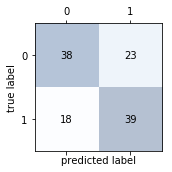

(123, 104)
             precision    recall  f1-score   support

         上昇       0.62      0.72      0.67        61
         降下       0.67      0.56      0.61        62

avg / total       0.65      0.64      0.64       123



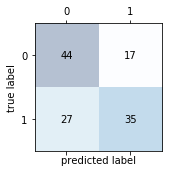

(111, 112)
             precision    recall  f1-score   support

         上昇       0.71      0.64      0.67        66
         降下       0.54      0.62      0.58        45

avg / total       0.64      0.63      0.63       111



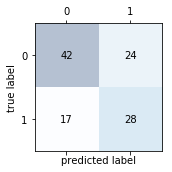

In [39]:
clf = MultinomialNB()
clf2 = RandomForestClassifier(random_state=1)
target_names=['上昇','降下']

for df,y in zip([kdf1,kdf2,kdf3],[y1,y2,y3]):
    clf.fit(df.values,y.values)
    print(df.shape)
    y_pred=cross_val_predict(clf,df.values,y.values,cv=50)
    confmat(y.values,y_pred,target_names)

(118, 167)
             precision    recall  f1-score   support

         上昇       0.61      0.67      0.64        61
         降下       0.61      0.54      0.57        57

avg / total       0.61      0.61      0.61       118



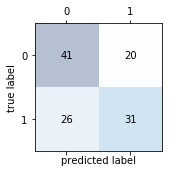

(123, 172)
             precision    recall  f1-score   support

         上昇       0.64      0.48      0.55        61
         降下       0.59      0.74      0.66        62

avg / total       0.62      0.61      0.60       123



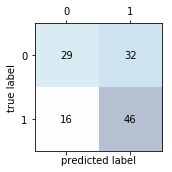

(111, 160)
             precision    recall  f1-score   support

         上昇       0.64      0.77      0.70        66
         降下       0.52      0.36      0.42        45

avg / total       0.59      0.60      0.59       111



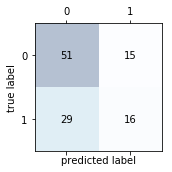

In [40]:
for df,y in zip([mdf1,mdf2,mdf3],[y1,y2,y3]):
    clf.fit(df.values,y.values)
    print(df.shape)
    y_pred=cross_val_predict(clf,df.values,y.values,cv=50)
    confmat(y.values,y_pred,target_names)

In [41]:
print()
print('翌月比  ベイズ RF ベイズTF RFIDF')
ML(kdf1,y1)
ML(kdf2,y2)
ML(kdf3,y3)
print('当月比  ベイズ RF ベイズTF RFIDF')
ML(mdf1,y1)
ML(mdf2,y2)
ML(mdf3,y3)
print()
print('前月比  ベイズ RF ベイズTF RFIDF')
ML(adf1,y1)
ML(adf2,y2)
ML(adf3,y3)



翌月比  ベイズ RF ベイズTF RFIDF

(118, 107) 65.5 60.3 62.3 69.7

(123, 104) 64.7 61.2 62.7 53.7

(111, 112) 61.0 55.0 60.3 58.7
当月比  ベイズ RF ベイズTF RFIDF

(118, 167) 59.7 70.0 57.8 63.3

(123, 172) 62.3 55.8 62.7 56.2

(111, 160) 60.0 50.7 64.3 50.7

前月比  ベイズ RF ベイズTF RFIDF

(118, 274) 60.7 60.8 59.8 65.5

(123, 276) 63.8 58.7 61.7 67.7

(111, 272) 58.7 55.3 64.3 58.0


In [237]:
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
def tuning(X,Y):
    
    X,Y = X.values, Y.values

    tuned_parameters = [
    	{'hidden_layer_sizes': [(100,),(200,),(100,100),(200,200)], 'learning_rate': ['invscaling', 'adaptive', 'constant'],
         'activation': ['logistic', 'identity', 'relu', 'tanh']},
    ]
    gsearch = GridSearchCV(MLPClassifier(max_iter=50), tuned_parameters, cv=4, scoring='accuracy', n_jobs=4)
    gsearch.fit(X, Y)

    print("ベストパラメータ:")
    print(gsearch.best_estimator_)

    print("各パラメータの平均スコア")
    for params, mean_score, all_scores in sorted(gsearch.grid_scores_, key=lambda k: k[1],reverse=True) :
        print("{:.3f} std:{:.3f} param: {}".format(mean_score, all_scores.std() , params))

In [182]:
tuning(adf3,y3)
tuning(adf2,y2)
tuning(adf1,y1)

ベストパラメータ:
MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
各パラメータの平均スコア
0.649 std:0.060 param: {'activation': 'logistic', 'hidden_layer_sizes': (200, 200), 'learning_rate': 'invscaling'}
0.640 std:0.074 param: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.631 std:0.069 param: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}
0.631 std:0.044 param: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
0.622 std:0.071 param: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'learning_ra

ベストパラメータ:
MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
各パラメータの平均スコア
0.627 std:0.129 param: {'activation': 'identity', 'hidden_layer_sizes': (200, 200), 'learning_rate': 'adaptive'}
0.619 std:0.070 param: {'activation': 'tanh', 'hidden_layer_sizes': (200,), 'learning_rate': 'invscaling'}
0.610 std:0.099 param: {'activation': 'logistic', 'hidden_layer_sizes': (200, 200), 'learning_rate': 'invscaling'}
0.610 std:0.096 param: {'activation': 'logistic', 'hidden_layer_sizes': (200, 200), 'learning_rate': 'adaptive'}
0.602 std:0.090 param: {'activation': 'logistic', 'hidden_layer_sizes': (200, 200), 'lea